In [38]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

In [43]:
import cv2
from PIL import Image as im
list_of_images = []

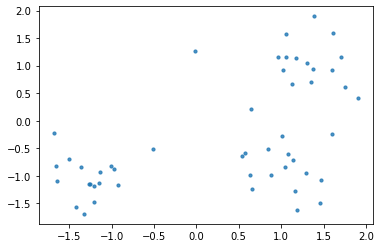

In [44]:
centers = [[1, 1], [-1, -1], [1, -1]]
#X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
#                            random_state=0)
X, _ = datasets.make_blobs(n_samples=50, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)

plt.savefig('imgfile.png')
image = cv2.imread('imgfile.png')
list_of_images.append(image)
f.close()


plt.show()





In [45]:
class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon
        
    def eps_neighborhood(self, P):
        neighborhood = []
        for Pn in range(len(self.dataset)):
            if np.linalg.norm(self.dataset[P] - self.dataset[Pn]) <= self.epsilon:
                neighborhood.append(Pn)
        return neighborhood
    
    def create_cluster_from(self, P, assignments, label):
        assignments[P] = label
        neighborhood = self.eps_neighborhood(P)
        while neighborhood:
            next_P = neighborhood.pop()
            
            if assignments[next_P] == label:
                continue
            assignments[next_P] = label
            if len(self.eps_neighborhood(next_P)) >= self.min_pts:
                neighborhood += self.eps_neighborhood(next_P)
                #we want to look at next neighborhood point
                
               
                 
        return assignments

    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """
        assignments = [0 for _ in range(len(self.dataset))]
        label = 1
        
        for P in range(len(self.dataset)):
            if assignments[P] != 0:
                continue #if its not 0 its already set so we just skip this and go to next one
            
            #in this case its 0 so we gotta set it
            if len(self.eps_neighborhood(P)) >= self.min_pts:
                #we found core point
                assignments = self.create_cluster_from(P, assignments, label)
                label += 1
                
        
        return assignments

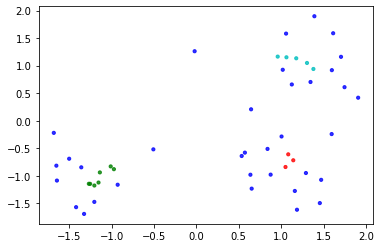

In [46]:
clustering = DBC(X, 3, .2).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[clustering].tolist(), s=10, alpha=0.8)


plt.savefig('imgfile.png')
image = cv2.imread('imgfile.png')
list_of_images.append(image)
f.close()


plt.show()

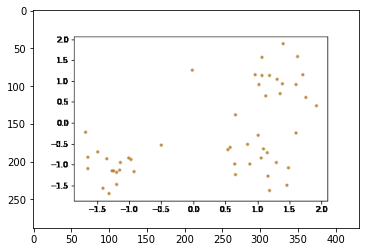

In [53]:
from numpy import *
from matplotlib.pyplot import *

data = im.fromarray(list_of_images[0])
imshow(list_of_images[0])

#from IPython import display
#display.Image(list_of_images[0])